# Mout Google **Drive** 


> To load Dataset  


*   For training
*   For validation
*   For testing 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# install the Dependencies
#!pip install kaggle
#!pip uninstall tensorflow
#!pip install tensorflow

In [3]:
from google.colab import files
import os

print("project's folder : ")
os.chdir('/content/drive/My Drive/New_Data')
!pwd


project's folder : 
/content/drive/My Drive/New_Data


# ***Install  prequest packages***

In [4]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from tensorflow.compat.v1 import GPUOptions
from tensorflow.compat.v1 import InteractiveSession
from pathlib import Path
from keras import  backend as k
from keras.layers import Activation
from keras.models import Model
from keras.applications import vgg16
from keras.optimizers import Adam, Adamax
from keras.metrics import categorical_crossentropy, binary_crossentropy
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow.keras.backend as K
from google.colab.patches import cv2_imshow
from skimage import img_as_ubyte
tf.compat.v1.enable_eager_execution()


%matplotlib inline
 
print("Pacakages added ")

if tf.executing_eagerly(): 
  print("eager execution enabled")
else:
  tf.compat.v1.enable_eager_execution()

Pacakages added 
eager execution enabled


## **Path to Dataset for training , validation and testing**

In [5]:
train_path = Path('/content/drive/MyDrive/New_Data/Defects/new_strategy/Data/train')
test_path =  Path('/content/drive/MyDrive/New_Data/Defects/new_strategy/Data/test')
valid_path = Path('/content/drive/MyDrive/New_Data/Defects/new_strategy/Data/validation')

print(train_path)
print(valid_path)
print(test_path)

/content/drive/MyDrive/New_Data/Defects/new_strategy/Data/train
/content/drive/MyDrive/New_Data/Defects/new_strategy/Data/validation
/content/drive/MyDrive/New_Data/Defects/new_strategy/Data/test


In [6]:
batch_size = 64
 
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),shuffle=False,
                                                         classes=['CR','V','VJ'], color_mode="rgb", batch_size=batch_size)
 
 
test_batches =  ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),shuffle=False,
                                                         classes=['CR','V','VJ'], color_mode="rgb", batch_size=batch_size)
 
 
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),shuffle=False,
                                                         classes=['CR','V','VJ'], color_mode="rgb" ,batch_size=batch_size)

Found 9849 images belonging to 3 classes.
Found 4221 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [7]:
test_true_class = test_batches.class_indices
print(test_true_class)

{'CR': 0, 'V': 1, 'VJ': 2}


# Loading vgg16 model

In [8]:

tf.keras.backend.set_image_data_format('channels_last')

gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

new_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = None)

x = new_model.output
x=Dense(256, activation='relu')(x)
x=Dropout(0.3)(x)
x=Dense(256, activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(516, activation='relu')(x)
x=Flatten()(x)
predictions=Dense(3, activation='softmax')(x)


vgg16_model = Model(inputs=new_model.input, outputs=predictions)

for layer in new_model.layers:
    layer.trainable = True

 
#for l in new_model.layers:
 #   vgg16_model.add(l)


#for layer in vgg16_model.layers:
 #   layer.trainable = True


'''
vgg16_model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))


vgg16_model.add(MaxPool2D(pool_size=(2,2),padding='same',strides=(2,2)))
vgg16_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

vgg16_model.add(MaxPool2D(pool_size=(2,2),padding='same',strides=(2,2)))
vgg16_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

vgg16_model.add(MaxPool2D(pool_size=(2,2),padding='same',strides=(2,2)))
vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

vgg16_model.add(MaxPool2D(pool_size=(2,2),padding='same',strides=(2,2)))
vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

vgg16_model.add(MaxPool2D(pool_size=(2,2),padding='same',strides=(2,2)))
vgg16_model.add(Conv2D(filters=1024, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=1024, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=1024, kernel_size=(3,3), padding="same", activation="relu"))

vgg16_model.add(MaxPool2D(pool_size=(2,2),padding='same',strides=(2,2)))
vgg16_model.add(Conv2D(filters=2048, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=2048, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=2048, kernel_size=(3,3), padding="same", activation="relu"))

 '''

'''
vgg16_model.add(Flatten())
vgg16_model.add(Dense(units=1024,activation="relu"))
vgg16_model.add(Dropout(0.5))
vgg16_model.add(Dense(units=1024,activation="relu"))
vgg16_model.add(Dropout(0.2))
vgg16_model.add(Dense(units=3, activation="softmax"))
'''
#softmax
#sigmoid
tf.compat.v1.InteractiveSession.close(session)



In [9]:
vgg16_model.summary()
print("\n \n \n \n \n summary of our model")


new_model.summary()
print("\n \n \n \n \n summary of our model")

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# Compile our model

In [10]:
vgg16_model.compile(Adamax(lr=.0001),loss='categorical_crossentropy',metrics=["accuracy"])

#sparse_categorical_crossentropy
#categorical_crossentropy
#optimizer=opt,Adam, Adamax

print('checked')

checked


In [11]:
train_num = train_batches.samples
valid_num = valid_batches.samples
test_num = test_batches.samples

print(train_num)
print(test_num)
print(valid_num)

9849
4221
3000


# ***Checkpoint to save the best accuracy ***

In [12]:
from keras.callbacks import ModelCheckpoint

filepath = "/content/drive/My Drive/New_Data/Save_Models/Defects_Best_vgg16.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
checkpoint2 = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint1,checkpoint2]
print( "vgg16 model is stored at",filepath)

vgg16 model is stored at /content/drive/My Drive/New_Data/Save_Models/Defects_Best_vgg16.h5


In [13]:

hist = vgg16_model.fit(train_batches, steps_per_epoch=train_num//batch_size,
                    validation_data = valid_batches, validation_steps=valid_num//batch_size,
                   epochs = 13,callbacks=callbacks_list, verbose=1)

#steps_per_epoch = train_num//batch_size
#validation_steps=valid_num//batch_size

Epoch 1/13
153/153 [==============================] - 164s 946ms/step - loss: 1.1483 - accuracy: 0.3088 - val_loss: 1.0901 - val_accuracy: 0.3397

Epoch 00001: val_accuracy improved from -inf to 0.33967, saving model to /content/drive/My Drive/New_Data/Save_Models/Defects_Best_vgg16.h5

Epoch 00001: accuracy improved from -inf to 0.33797, saving model to /content/drive/My Drive/New_Data/Save_Models/Defects_Best_vgg16.h5
Epoch 2/13
153/153 [==============================] - 129s 842ms/step - loss: 1.0844 - accuracy: 0.4148 - val_loss: 1.0879 - val_accuracy: 0.3502

Epoch 00002: val_accuracy improved from 0.33967 to 0.35020, saving model to /content/drive/My Drive/New_Data/Save_Models/Defects_Best_vgg16.h5

Epoch 00002: accuracy improved from 0.33797 to 0.37333, saving model to /content/drive/My Drive/New_Data/Save_Models/Defects_Best_vgg16.h5
Epoch 3/13
153/153 [==============================] - 129s 840ms/step - loss: 1.0937 - accuracy: 0.3471 - val_loss: 1.0673 - val_accuracy: 0.3397


# Evaluate Test Data

In [14]:
test_result = vgg16_model.evaluate(test_batches,verbose=1,batch_size=batch_size)
print("test loss, test acc:", test_result)


66/66 [==============================] - 26s 393ms/step - loss: 0.0221 - accuracy: 0.9995
test loss, test acc: [0.022083355113863945, 0.9995262026786804]


['CR', 'V', 'VJ']
Confusion matrix, without normalization
[[1407    0    0]
 [   2 1405    0]
 [   0    0 1407]]


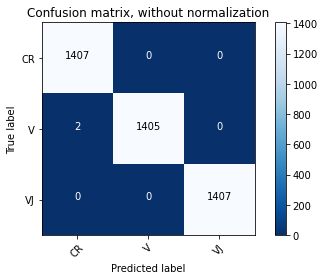

              precision    recall  f1-score   support

          CR       1.00      1.00      1.00      1407
           V       1.00      1.00      1.00      1407
          VJ       1.00      1.00      1.00      1407

    accuracy                           1.00      4221
   macro avg       1.00      1.00      1.00      4221
weighted avg       1.00      1.00      1.00      4221

['CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 

In [15]:
from sklearn.metrics import confusion_matrix,classification_report

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues_r):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


predictions = vgg16_model.predict(test_batches,  test_num // batch_size+1)

y_pred = np.argmax(predictions, axis=1)

true_classes = test_batches.classes

class_labels = list(test_batches.class_indices.keys())   

print(class_labels)

confusion_matrix = confusion_matrix(test_batches.classes, y_pred )
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=class_labels,
                      title='Confusion matrix, without normalization')
plt.show()

report = classification_report(true_classes, y_pred, target_names=class_labels)
print(report)

labels_new = test_batches.class_indices
labels_new = dict((v,k) for k,v in labels_new.items())
predictions_new = [labels_new[k] for k in y_pred]

print(predictions_new)

# **Prediction**

Void_example.PNG


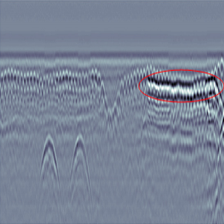

Corrosion_example.PNG


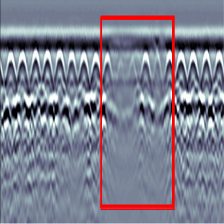

Vertical_crack_example.PNG


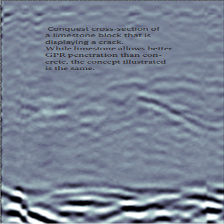

V2.jpeg


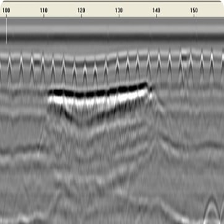

CR1.jpeg


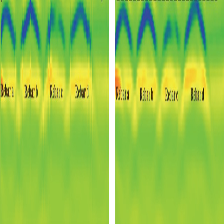

VJ1.jpeg


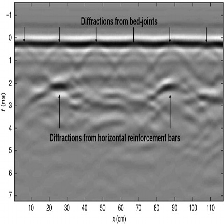

VJ2.jpeg


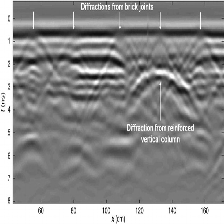

V1.jpeg


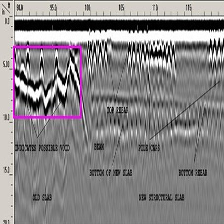

Done


In [16]:
import cv2, numpy as np

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions

'''
im1 = cv2.resize(cv2.imread('/content/drive/MyDrive/New_Data/prediction/Negative5.png'), (48, 48)).astype(np.float32)
im1= image.img_to_array(im1)
im1= np.expand_dims(im1, axis=1)
im2 =  preprocess_input(im1)

im2 = cv2.resize(cv2.imread('/content/drive/MyDrive/New_Data/prediction/Negative6.png'), (48, 48)).astype(np.float32)
im2 = image.img_to_array(im2)
im2= np.expand_dims(im2, axis=1)
im2 =  preprocess_input(im2)

weight = vgg16_model.get_weights()
print(weight)
'''
img_names = []
pred_images = []
pred_path = '/content/drive/MyDrive/New_Data/prediction/Defects/'

for filename in os.listdir(pred_path):
        img = cv2.imread(os.path.join(pred_path,filename))                
        if img is not None:
            img_new = cv2.resize(img,(224,224),interpolation = cv2.INTER_CUBIC).astype(np.float32)
            print(filename)
            img_names.append(filename)
            i = cv2_imshow(img_new)
            img_new = image.img_to_array(img_new)
            img_new= np.expand_dims(img_new, axis=0)
            img_new =  preprocess_input(img_new)
            pred_images.append(img_new)
            


#weight = vgg16_model.get_weights()
#print(weight)            



print("Done")




In [17]:
'''
out2 = vgg16_model.predict(im2, batch_size=batch_size, verbose=1, steps=1, callbacks=callbacks_list)
print('positive preditcion %')
print(out2[0][0])
print('Negative preditcion %')
print(out2[0][1])

if out2[0][0] > out2[0][1]:
    print("The image is positive")
if out2[0][0] < out2[0][1]:
    print('The image is Negative')  

'''

from keras import backend as K
if K.image_data_format() == 'channels_first':
 input_shape = (3, 224, 224)
else:
 input_shape = (224, 224, 3)



for x in img_names:
  z = 0
  print(" True Classes are : ",x)

for i in pred_images:
  
  
  out1 = vgg16_model.predict(i, batch_size=batch_size, verbose=1, steps=1, callbacks=callbacks_list)
  arg = np.argmax(out1, axis = 1)
  print("predicted class : ",arg)

  
  print('-----------------------------------------------') 
  print('-----------------------------------------------') 

  print('CR preditcion %')
  print(out1[0][0])
  print('V preditcion %')
  print(out1[0][1])
  print('VJ preditcion %')
  print(out1[0][2])

  if out1[0][0] > out1[0][1] and out1[0][0] > out1[0][2]:
      print("{")
      print("The image is CR")
      print("}")
  if out1[0][1] > out1[0][0] and out1[0][1] > out1[0][2]:
      print("{")
      print('The image is V')
      print("}")
  if out1[0][2] > out1[0][0] and out1[0][2] > out1[0][1]:
      print("{")
      print('The image is VJ')
      print("}")
  print('-----------------------------------------------') 
  print('-----------------------------------------------') 

  print(out1)

  print('-----------------------------------------------') 
  print('-----------------------------------------------') 

pred_images.clear()
img_names.clear()

 True Classes are :  Void_example.PNG
 True Classes are :  Corrosion_example.PNG
 True Classes are :  Vertical_crack_example.PNG
 True Classes are :  V2.jpeg
 True Classes are :  CR1.jpeg
 True Classes are :  VJ1.jpeg
 True Classes are :  VJ2.jpeg
 True Classes are :  V1.jpeg
1/1 [==============================] - 1s 858ms/step
predicted class :  [0]
-----------------------------------------------
-----------------------------------------------
CR preditcion %
0.5527969
V preditcion %
0.34831285
VJ preditcion %
0.098890215
{
The image is CR
}
-----------------------------------------------
-----------------------------------------------
[[0.55 0.35 0.1 ]]
-----------------------------------------------
-----------------------------------------------
1/1 [==============================] - 0s 19ms/step
predicted class :  [0]
-----------------------------------------------
-----------------------------------------------
CR preditcion %
0.9116663
V preditcion %
0.08065393
VJ preditcion %
0

## ***Save model ***

In [18]:
#vgg16_model.save('vgg16_classifier.h5')
 
#print('model saved with name vgg16-classifier.h5  at'  )
#!pwd

model_json = vgg16_model.to_json()
with open("/content/drive/My Drive/New_Data/Save_Models/Defects_vgg16.json", "w") as json_file:
    json_file.write(model_json)

print('model saved with name VGG16_model.json.h5  at /content/drive/My Drive/New_Data/Save_Models/'  )


vgg16_model.save_weights("/content/drive/My Drive/New_Data/Save_Models/Defects_weights.h5")
print('model Weights saved with name model_weights.h5  at /content/drive/My Drive/New_Data/Save_Models/'  )


model saved with name VGG16_model.json.h5  at /content/drive/My Drive/New_Data/Save_Models/
model Weights saved with name model_weights.h5  at /content/drive/My Drive/New_Data/Save_Models/


# **Load The JSON File**

In [37]:
# imports

from keras.models  import model_from_json 

# opening and store file in a variable

json_file = open('/content/drive/My Drive/New_Data/Save_Models/Defects_vgg16.json','r')
loaded_model_json = json_file.read()
json_file.close()

# use Keras model_from_json to make a loaded model

loaded_model = model_from_json(loaded_model_json)

# load weights into new model

loaded_model.load_weights("/content/drive/My Drive/New_Data/Save_Models/Defects_weights.h5")
print("Loaded Model from disk")

# compile and evaluate loaded model

loaded_model.compile(loss='categorical_crossentropy',optimizer='Adamax',metrics=['accuracy'])


Loaded Model from disk


# **Load File**

In [41]:
import numpy as np
import keras.models
from keras.models import model_from_json
import tensorflow as tf


def init_Defects(): 
      json_file = open('/content/drive/My Drive/New_Data/Save_Models/Defects_vgg16.json','r')
      loaded_model_json = json_file.read()
      json_file.close()
      loaded_model = model_from_json(loaded_model_json)
      #load weights into new model
      loaded_model.load_weights("/content/drive/My Drive/New_Data/Save_Models/Defects_weights.h5")
      print("Loaded Model from disk")
      loaded_model.compile(loss='categorical_crossentropy',optimizer='Adamax',metrics=['accuracy'])
      graph = tf.compat.v1.get_default_graph()
      
      return loaded_model,graph



<bound method Graph.as_default of <tensorflow.python.framework.ops.Graph object at 0x7f0736705ad0>>


# **App Loading Model For Defects**

Loaded Model from disk
Void_example.PNG


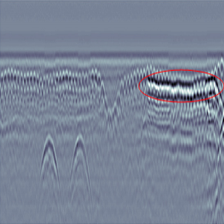

----------------------------------
 True Classes are :  Void_example.PNG
----------------------------------
 True Classes are :  Corrosion_example.PNG
----------------------------------
 True Classes are :  Vertical_crack_example.PNG
----------------------------------
 True Classes are :  V2.jpeg
----------------------------------
 True Classes are :  CR1.jpeg
----------------------------------
 True Classes are :  VJ1.jpeg
----------------------------------
 True Classes are :  VJ2.jpeg
----------------------------------
 True Classes are :  V1.jpeg
----------------------------------
 True Classes are :  Void_example.PNG
----------------------------------
 True Classes are :  Corrosion_example.PNG
----------------------------------
 True Classes are :  Vertical_crack_example.PNG
----------------------------------
 True Classes are :  V2.jpeg
----------------------------------
 True Classes are :  CR1.jpeg
----------------------------------
 True Classes are :  VJ1.jpeg
---------------

In [45]:
import numpy as np
import keras.models
import re
import sys 
import os
import base64
sys.path.append(os.path.abspath("./Save_Models"))

global graph, model

model, graph = init_Defects()


def predict():
      for filename in os.listdir(pred_path):
        img = cv2.imread(os.path.join(pred_path,filename))                
        if img is not None:
            img_new = cv2.resize(img,(224,224),interpolation = cv2.INTER_CUBIC).astype(np.float32)
            print(filename)
            img_names.append(filename)
            i = cv2_imshow(img_new)
            img_new = image.img_to_array(img_new)
            img_new= np.expand_dims(img_new, axis=0)
            img_new =  preprocess_input(img_new)
            pred_images.append(img_new)

      
        for x in img_names:
            print("----------------------------------")
            print(" True Classes are : ",x)

        for i in pred_images:
          
          
          out1 = model.predict(i,verbose=1)
          arg = np.argmax(out1, axis = 1)
          print("predicted class : ",arg)

          
          print('-----------------------------------------------') 
          print('-----------------------------------------------') 

          print('CR preditcion %')
          print(out1[0][0])
          print('V preditcion %')
          print(out1[0][1])
          print('VJ preditcion %')
          print(out1[0][2])

          if out1[0][0] > out1[0][1] and out1[0][0] > out1[0][2]:
              print("{")
              print("The image is CR")
              print("}")
          if out1[0][1] > out1[0][0] and out1[0][1] > out1[0][2]:
              print("{")
              print('The image is V')
              print("}")
          if out1[0][2] > out1[0][0] and out1[0][2] > out1[0][1]:
              print("{")
              print('The image is VJ')
              print("}")
          print('-----------------------------------------------') 
          print('-----------------------------------------------') 

          print(out1)

          print('-----------------------------------------------') 
          print('-----------------------------------------------') 

        return out1	

predict()
pred_images.clear()
img_names.clear()

# **Confusion Matrix**

In [ ]:
'''

#https://scikit-learn.org/stable/auto_examples/model_selection/
#plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

model = vgg16_model(inputs=vgg16_model.input, outputs= vgg16_model(vgg16_model.output))
#model = Model(input= base_model.input, output= model(base_model.output))
Y_pred = model.predict_generator(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)

#Compute confusion matrix
cnf_matrix = confusion_matrix(valid_generator.classes, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

'''


"""
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=target_names))
"""


'''
M2= tf.math.confusion_matrix(
     labels,out2[0], num_classes=2, weights=None, dtype=tf.dtypes.float32
)

print(M2)

print ('-------------------------------------')
'''

'''
EXAMPLE: 

test_loss, test_acc = _model.evaluate(test_images, test_labels)

    print('\nTest accuracy:', test_acc)
    print('\nTest loss:', test_loss)

    pred = _model.predict(test_images)
    print(pred)
    max_predictions = tf.argmax(pred, axis=1)
    print(max_predictions)
    print(tf.math.confusion_matrix(labels=test_labels, predictions=max_predictions))

    print('Sum Test: ', sum(sum(pred)))

'''

labels=[0,1,2]


M1= tf.math.confusion_matrix(
     labels,out1[0], num_classes=3, weights=None, dtype=tf.dtypes.float32
)
print(M1)

print('----------------------')

max_predictions = tf.argmax(out1, axis=0)
print(max_predictions)
print(tf.math.confusion_matrix(
     labels,max_predictions, num_classes=2, weights=None, dtype=tf.dtypes.float32))

print('Sum Test: ', sum(sum(out1)))


# ***Loard the saved model***

In [ ]:
from keras.models import load_model

load_vgg16 = load_model("/content/drive/My Drive/vgg16_classifier.h5")
print("model loaded ssuccessfully")

# **Customized model other than sequential**



In [ ]:
'''
inputs = tf.keras.Input(shape=(50,50,3))
x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
outputs = tf.keras.layers.Dense(2, activation="softmax")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

class MyModel(tf.keras.Model):

  def __init__(self):
    super(MyModel, self).__init__()
    self.dense1 = tf.keras.layers.Dense(1, activation=tf.nn.relu)
    self.dense2 = tf.keras.layers.Dense(2, activation=tf.nn.softmax)
    self.dropout = tf.keras.layers.Dropout(0.5)

  def build(self, input_shape):  # Create the state of the layer (weights)
    w_init = tf.random_normal_initializer()
    self.w = tf.Variable(
        initial_value=w_init(shape=(input_shape[-1], self.units),
                             dtype='float32'),
        trainable=True)
    b_init = tf.zeros_initializer()
    self.b = tf.Variable(
        initial_value=b_init(shape=(self.units,), dtype='float32'),
        trainable=True)

  def call(self, inputs, training=False):
    x = self.dense1(inputs)
    if training:
      x = self.dropout(x, training=training)
    return self.dense2(x)

'''

# Visualising Training Progress

In [ ]:
#plotting training values

#hist=vgg16_model

import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()


 #plot 2 graphs check code

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss1 = hist.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss1, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# ***Performance of the Model***

In [ ]:
accuracy = np.array(acc)
print('Training accuracy of fine-tuned vgg16  model is     :   '  , accuracy[-1]*100,'%' )
val_accuracy = np.array(val_acc)
print('Validation  accuracy of fine-tuned vgg16  model is  :   ' , val_accuracy[-1]*100,'%')

t_loss = np.array(loss)
print('training   loss of fine-tuned vgg16  model   is     :   ' , t_loss[-1]*100,'%')
val_loss = np.array(val_loss1)
print('Validation  loss of fine-tuned vgg16  model  is     :   ' , val_loss[-1]*100,'%')


#  Training  Accuracy
# and 
# Validation accuracy



In [ ]:
accuracy = np.array(acc)
print(' Training Accuracy of model is      :   '  , accuracy[-1]*100,'%' )

val_accuracy = np.array(val_acc)
print(' \n \n Validation  Accuracy of model is      :   '  , val_accuracy[-1]*100,'%' )

# test set

In [ ]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(48,48), rows=5, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=20)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
print('checked')

In [ ]:
imgs,test_labels = next(test_batches)
print('checked')

In [ ]:
# this is actually encording
plots(imgs,rows=1,titles = test_labels)
print('checked')


In [ ]:
test_labels = test_labels[0:37]
test_labels
# print(imgs, result[:,0])

# Prediction

In [ ]:
predictions = vgg16_model.predict_generator(train_batches,steps=25,verbose=1)

In [ ]:
predictions

In [ ]:
import seaborn as sns
import sklearn.metrics as metrics

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# ** code of confusion matrix**

In [ ]:
cm = confusion_matrix(test_labels,predictions[:,0])

In [ ]:



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
  
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# *** confusion of test data***

# test set

In [ ]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,20), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=20)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
print('checked')

In [ ]:
imgs,test_labels = next(test_batches)
print('checked')

In [ ]:
# this is actually encording
plots(imgs,titles = test_labels)
print('checked')

In [ ]:
test_labels = test_labels[:,0]
test_labels
# print(imgs, result[:,0])

In [ ]:
test_batches =  ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224), classes=['black_measles','black_rot','healthy','leaf_blight'], batch_size=20)

# #Preductions

In [ ]:
predictions = vgg16_model.predict_generator(test_batches,steps=1,verbose=0)

In [ ]:
predictions

# **Calculate and plot confusion matrix:**

In [ ]:
import itertools

In [ ]:
# def plot_confusion_matrix(cm, classes, figname, normalize=False,
#                           cmap=plt.cm.Blues):
#   if normalize:
#     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#     print('Normalized confusion matrix')
#   else:
#     print('Confusion matrix, without normalization')
#   plt.figure(figsize=(8,8))
#   plt.title('Confusion Matrix')
#   tick_marks = np.arange(len(classes))
#   plt.xticks(tick_marks, classes, rotation=90)
#   plt.yticks(tick_marks, classes)
#   fmt = '.2f' if normalize else 'd'
#   thresh = cm.max() / 2.
#   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#     plt.text(j, i, format(cm[i, j], fmt),
#              horizontalalignment='center',
#              color='white' if cm[i, j] > thresh else 'black')
    
#   plt.ylabel('True label')
#   plt.xlabel('Predicted label')
#   plt.tight_layout()
#   plt.savefig(figname)




In [ ]:
# test_img, test_labells = next(test_batches)

In [ ]:
# Y_pred = vgg16_model.predict_generator(test_batches)
# y_pred = np.argmax(Y_pred, axis=1)

# cm = confusion_matrix(test_batches.classes, y_pred)
# plot_confusion_matrix(cm, classes = test_labels , normalize=False, figname = 'Confusion_matrix_concrete.jpg')

**Confusion matrix of testing data**

In [ ]:
# #Y_pred = model.predict_generator(test_generator)
# from keras.utils import to_categorical
# #One Hot Encoding
# x_test=to_categorical(test_batches.classes)


# Y_pred = vgg16_model.predict_generator(test_batches)
# y_test=to_categorical(Y_pred)

# y_pred = np.argmax(Y_pred, axis=1)

# cm = confusion_matrix(x_test, y_pred)
# plot_confusion_matrix(cm, classes = test_labels, title='Confusion Matrix of vgg16_model', normalize=False)

In [ ]:



# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')
  
#     print(cm)

#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, cm[i, j],
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')

# *** confusion of test data***

In [ ]:
test_img, test_labells = next(test_batches)

plots(test_img, titles=test_labells )
print(test_labells)

In [ ]:
predictions = vgg16_model.predict_generator(test_batches,steps=1,verbose=0)

In [ ]:
x_test=to_categorical(test_labells)
print(x_test)

In [ ]:


y_pred=vgg16_model.predict_classes(test_batches, verbose = 1)
y_true=np.argmax(test_labells,axis=1)

In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

In [ ]:
#Plotting normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names, normalize = True, title = 'Normalized confusion matrix')

confusion matrix of VGG19 

In [ ]:
test_labels

In [ ]:
Training accuracy of fine-tuned vgg19  model is     :    99.34584498405457 %
Validation  accuracy of fine-tuned vgg19  model is  :    95.41962742805481 %
training   loss of fine-tuned vgg19  model   is     :    3.6343192487354306 %
Validation  loss of fine-tuned vgg1  model  is     :    17.331895232200623 %

#  Compare the accuracy of VGG16 and VGG19

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = [ "vgg16" , "vgg19"]
Traning_loss = [3.6,3.6]
Traning_accuracy  = [99.4,99.3]
Valadation_loss= [16.3, 17.3]
Valadation_accuracy = [95.8,95.4]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x +0.0, Traning_loss, width, label='Traning_loss', color = "r")
rects2 = ax.bar(x + 0.25, Traning_accuracy, width, label='Traning_accuracy',color = "b")
rects3 = ax.bar(x + 0.50, Valadation_loss, width, label='Valadation_loss', color = "orange")
rects4 = ax.bar(x +  0.75, Valadation_accuracy, width, label='Valadation_accuracy', color = "g")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage %')
ax.set_title('Camparsion of VGG16 and VGG19')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()